# Character Recognition

Task-

> Use this [dataset](https://www.dropbox.com/s/pan6mutc5xj5kj0/trainPart1.zip) to train a
CNN. Use no other data source or pretrained networks, and explain your design choices during preprocessing, model building and training. Also, cite the sources you used to
borrow techniques. A test set will be provided later to judge the performance of your
classifier. Please save your model checkpoints.

## 1. Importing Modules

In [2]:
import os
import random
import copy
import time 

import torch
import torchvision
import torch.optim as optim
import torch.utils.data as data
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
from data import dataset 
from plotting import plot_loss, plot_images
from model import Net

## 2. Data Preprocessing

In [3]:
df = pd.read_csv('../input/training/Labels.csv')
df.head()

,Unnamed: 0,filenames,labels_code,labels
0,0,img001-001.png,img001,0
1,1,img001-002.png,img001,0
2,2,img001-003.png,img001,0
3,3,img001-004.png,img001,0
4,4,img001-007.png,img001,0


In [6]:
train_transforms = transforms.Compose([
                   transforms.RandomResizedCrop(64, scale=(0.9, 1.0), ratio=(0.9, 1.1)),
                   transforms.ToTensor(),
                   transforms.Normalize(mean = [0.5,0.5,0.5], std = [0.5,0.5,0.5])

               ])

In [7]:
LABELS='../input/training/Labels.csv' 
ROOT = '../input/training/train/train/'
VALID_RATIO = 0.9

train_data = dataset(csv=LABELS, img_path=ROOT, transform = train_transforms)

In [ ]:
n_train_examples = int(len(train_data) * VALID_RATIO)
n_valid_examples = len(train_data) - n_train_examples
train_data, valid_data = data.random_split(train_data,[n_train_examples, n_valid_examples])

In [8]:
valid_data = copy.deepcopy(valid_data)
valid_data.dataset.transform = train_transforms

In [9]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')

Number of training examples: 2232
Number of validation examples: 248


In [10]:
BATCH_SIZE = 32
train_iterator = data.DataLoader(train_data,batch_size = BATCH_SIZE)
valid_iterator = data.DataLoader(valid_data,batch_size = BATCH_SIZE)

## 3. Images

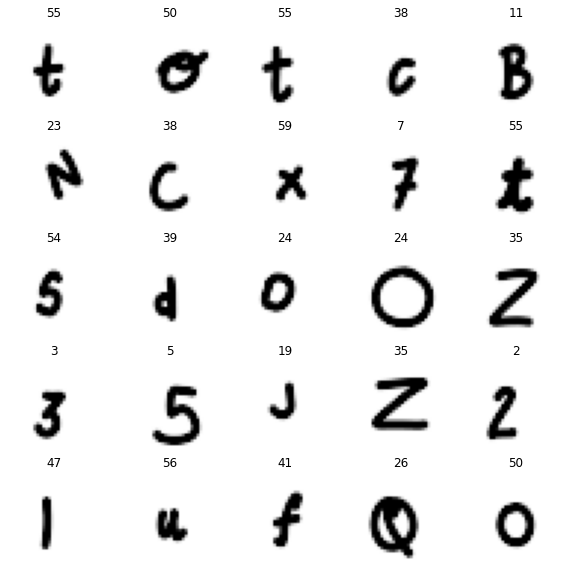

In [12]:
N_IMAGES = 25
images, labels = zip(*[(image, label) for image, label in [train_data[i] for i in range(N_IMAGES)]])
classes = list(df['labels'].unique())
plot_images(images, labels, classes)

## 4. Hyper-parameters

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_epochs = 30 
model = Net(62)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
device

device(type='cuda')

## 5. Training

In [ ]:

train_acc_list, valid_acc_list = train_model(model=model, num_epochs=num_epochs,train_loader=train_iterator,                                                          valid_loader=valid_iterator,optimizer=optimizer,
                                             criterion=criterion, device=device)


## 6. Plotting Loss and Accuracy of model

In [ ]:
plot_loss(train_acc_list=train_acc_list,valid_acc_list=valid_acc_list, results_dir=None)
plt.ylim([60, 100])
plt.show()

## 7. Results

# Conclusion